# Machine Learning - Laboratory 3

In [11]:
import getopt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from pdffuns import *
import pickle

In [12]:
def labsol3(met='ML', discr='pxw', prm = []):
    
    # Initialise values:
    # - axes, x1 and x2
    x1 = np.arange(-6.25,6.26,0.5).reshape(-1,1)
    x2 = np.arange(-6.25,6.26,0.5).reshape(-1,1)

    # Get coordinates grid
    X1, X2 = np.meshgrid(x1, x2)

    # Pack everything
    Xgrid = np.dstack((X1, X2))

    # Load data from pickle files
    pfile = 'lab3.p'
    with open(pfile, "rb") as fp:
        X=pickle.load(fp)

    # Number of classes
    M = len(X)

    # Feature dimension
    l = len(X[0])

    # Estimate prior probabilities, Pwi[k].
    N, Pw = [], []

    # Number of feature vectors: N[i] --> Feature vectors of class i
    for i in range(M):
        N.append(len(X[i][0]))
    
    # Determine Pwi
    for i in range(M):
        Pw.append(N[i]/sum(N))

    
    # Initialise method specific parameters
    # - on condition of met
    # - Maximum likelihood: my, Sgm (empty)
    # - Parzen window: h1 from prm
    # - kn nearest neighbor: knn from prm
    if met == 'ML':
        my = np.zeros(shape=(M, l), dtype=float)
        Sgm = np.zeros(shape=(M, l, l), dtype=float)
    if met == 'knn':
        my = None
        Sgm = None
        kn = prm[0]
    if met == 'PZ':
        my = None
        Sgm = None
        h1 = prm[0]
    # - parameters, my[i] and Sgm[i], i = 0,...,M-1
    # - prior probabilities, Pw[i], i = 0,...,M-1
    
    # Determine class specific probability density functions, pxw[i], i = 0,...,M-1
    # - initialise pxw as empty list
    pxw = np.zeros(shape=(M, np.shape(Xgrid)[0], np.shape(Xgrid)[1]))

    g = np.zeros(shape=pxw.shape)
    # - initialise total density function, p as zero
    p = 0
    # - iterate over classes, k = 0,...,M-1
    for i in range(M):
        
        # - Maximum likelihood:
        if met == 'ML':
            # - estimate parameters my[k], Sgm[k]
            for j in range(l):
                my[i][j] = np.mean(X[i][j])
            
            Sgm[i] = np.cov(X[i])

            # - determine pxw[k] by using norm2D
            # Reshape 'my' to pass it as a column vector
            pxw[i, :, :] = norm2D(my[i].reshape(-1, 1), Sgm[i], Xgrid)

        # - kn-nearest neighbor:
        if met == "knn":
            # - use knn2D to determine pxw[k] from X[k]
            pxw[i, :, :] = knn2D(X[i], Xgrid, kn)
            
        # - Parzen window:
        if met == "PZ":
            hn = h1/np.sqrt(N[i])
            hnI = hn**2 * np.eye(l)
            
            # iterate over all feature vectors in class i 
            for j in range(0, N[i]):
                # feature vector j of class i 
                xk = X[i][:,j].reshape(l,1)
                # sum up the probabilities of each of the N[i] distributions
                # Note that there is one distribution for each datapoint!
                pxw[i, :, :] = pxw[i, :, :] + norm2D(xk, hnI, Xgrid)
                # divide by number of feature vectors in class i 
                pxw[i, :, :] /= N[i]
            
        # - update p
        p += Pw[i] * pxw[i]

    # Determine discriminant functions, g[k], k = 0,...,M-1
    for i in range(M):
        g[i] = (Pw[i] * pxw[i])
        
    return x1, x2, my, Sgm, g/p, g

## Sections a), b), c) and d)

Estimated mean vectors: 
[[2.65 ]
 [5.825]] 
 [[ 2.8       ]
 [-1.76666667]]
Estimated covariance matrices: 
[[[ 0.19666667  0.005     ]
  [ 0.005       0.73583333]]

 [[ 1.11       -0.01      ]
  [-0.01        2.92333333]]]


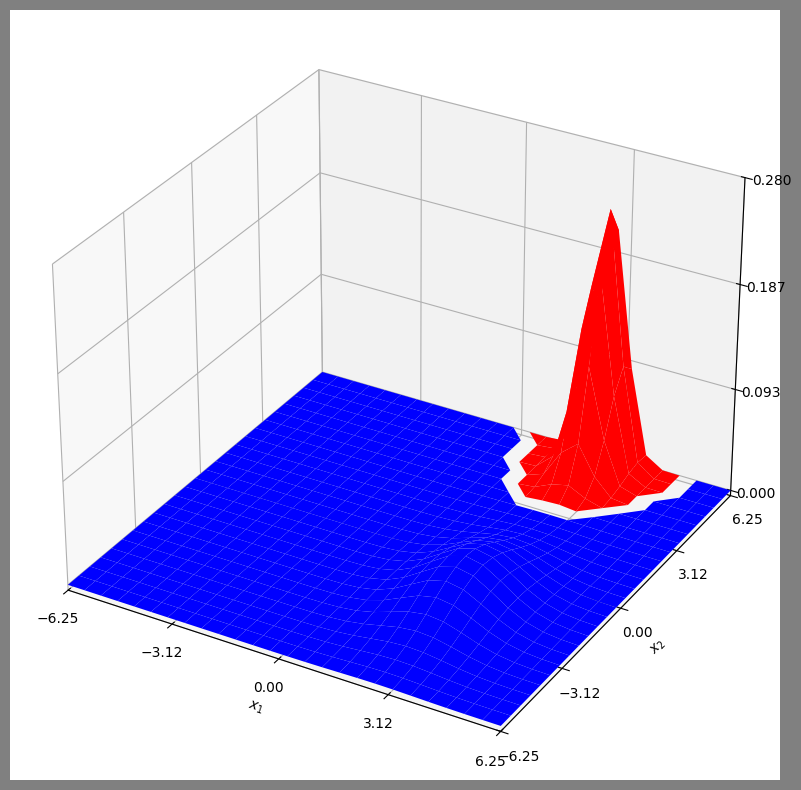

In [13]:
# Call the function to get the data
x1, x2, my, Sgm, posterior, df= labsol3()

# Print estimated parameters
print(f"Estimated mean vectors: \n{my[0].reshape(-1, 1)} \n {my[1].reshape(-1, 1)}")
print(f"Estimated covariance matrices: \n{Sgm}")

# Plot the discriminant functions
classplot(df, x1, x2, 1, gsv={'gsv': 1, 'figstr': 'pdf'})

## Section e)

If we compare this discriminant functions to the ones that we got in __labsol2.ipynb__, we can notice they are quite similar. Nevertheless, we can also see that the decision border is less smoothed, this could be directly caused by the few amount of data we have to estimate the parameters $\mu$ and $\Sigma$.

## Section f)

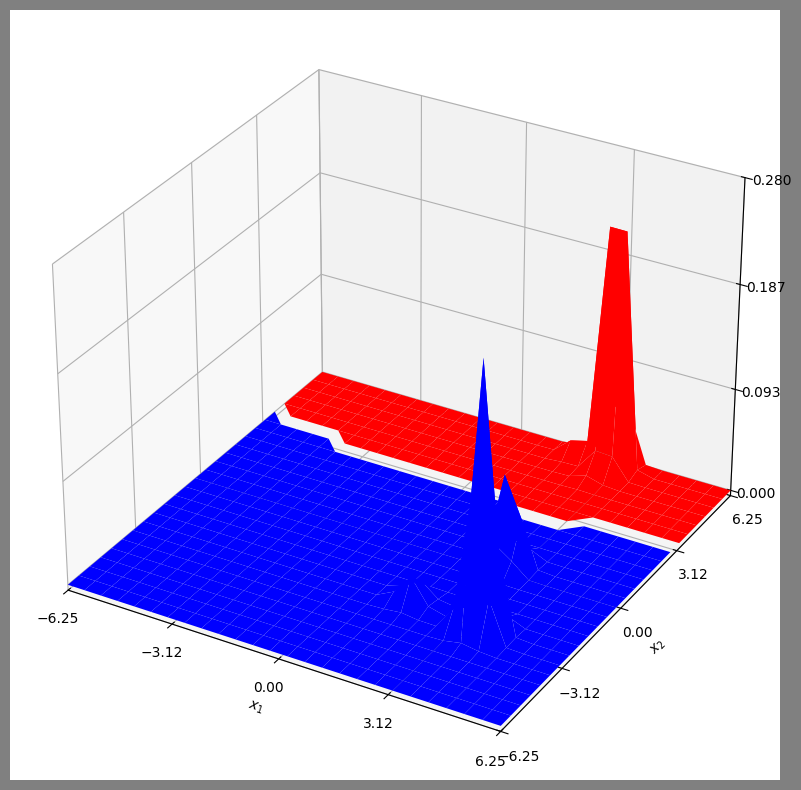

In [14]:
x1, x2, my, Sgm, posterior, df = labsol3('PZ', 'pxw', [0.5])

classplot(df, x1, x2, 1, gsv={'gsv': 1, 'figstr': 'pdf'})

## Section g)

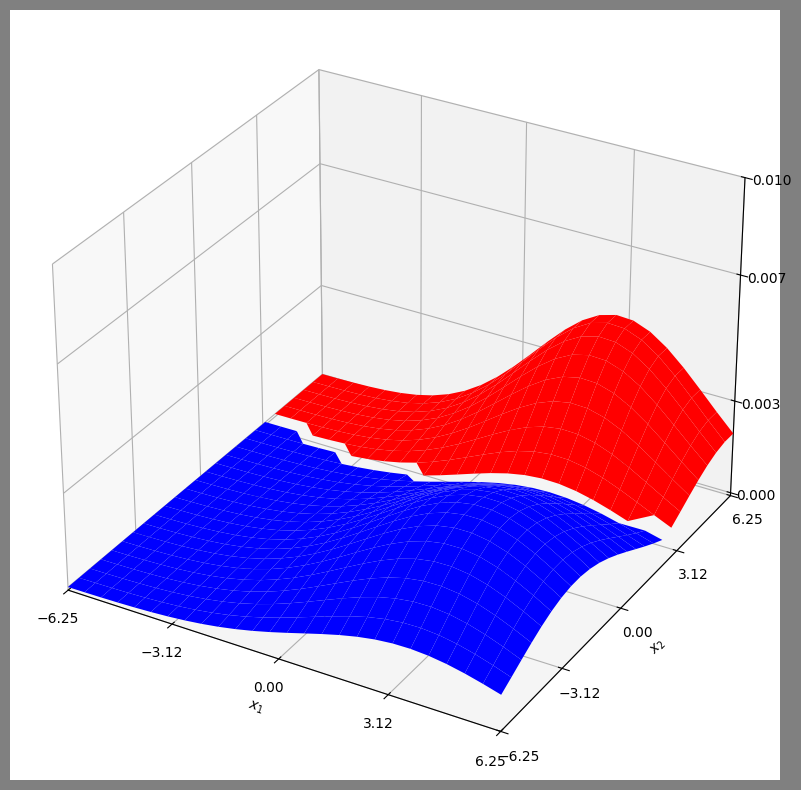

In [15]:
# Call the function to get the data
x1, x2, my, Sgm, posterior, df = labsol3('PZ', 'pxw', [5.])

classplot(df, x1, x2, 1, gsv={'gsv': 1, 'figstr': 'pdf'})

## Section h)

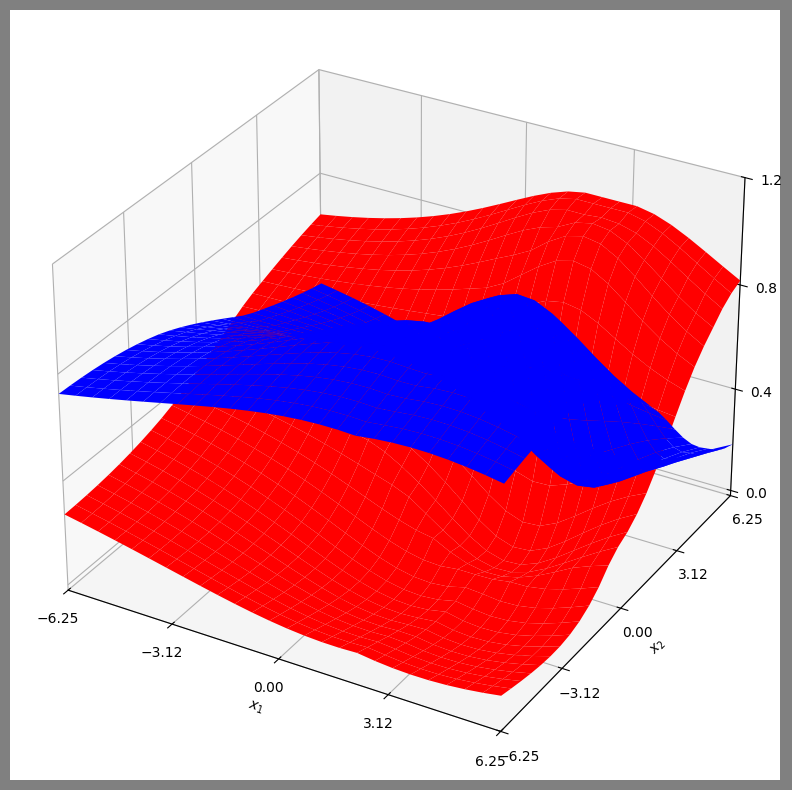

In [16]:
# Call the function to get the data
x1, x2, my, Sgm, posterior, df= labsol3('knn', 'pxw', [1])

# Plot the discriminant functions
classplot(posterior, x1, x2, 0, gsv={'gsv': 1, 'figstr': 'pdf'})

## Section i)

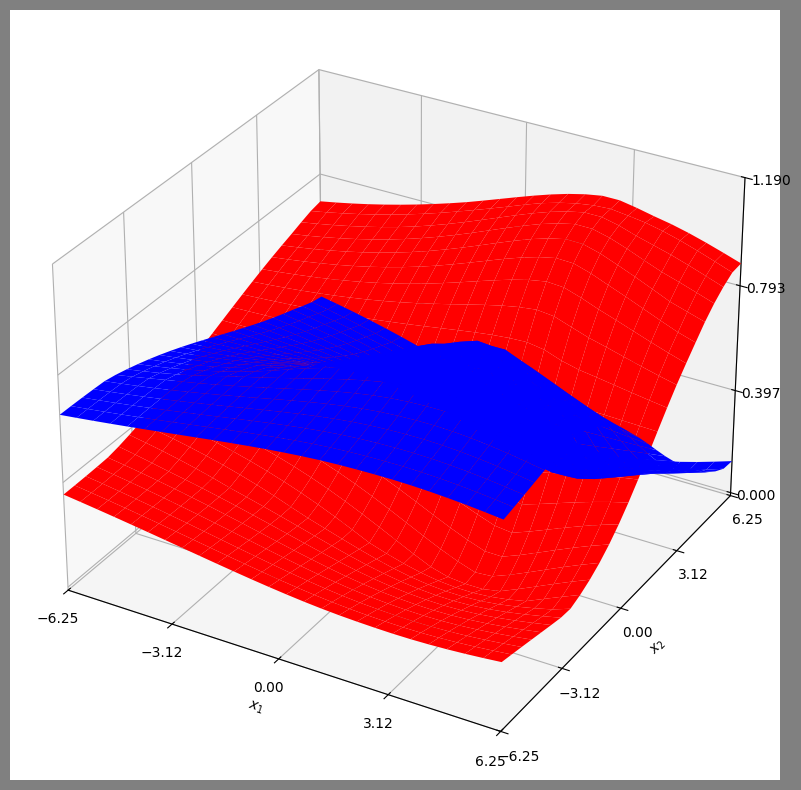

In [17]:
# Call the function to get the data
x1, x2, my, Sgm, posterior, df = labsol3('knn', 'pxw', [3])

# Plot the discriminant functions
classplot(posterior, x1, x2, 0, gsv={'gsv': 1, 'figstr': 'pdf'})

## Section j)

In [18]:
# Call the function to get the data
x1, x2, my, Sgm, posterior, df = labsol3('knn', 'pxw', [5])

# Plot the discriminant functions
classplot(posterior, x1, x2, 0, gsv={'gsv': 1, 'figstr': 'pdf'})

Kn can't be bigger than the size of the dataset
Kn can't be bigger than the size of the dataset


C:\Users\danie\AppData\Local\Temp\ipykernel_17332\656256274.py:105: RuntimeWarning: invalid value encountered in divide
  return x1, x2, my, Sgm, g/p, g


ValueError: cannot convert float NaN to integer

Error in callback <function _draw_all_if_interactive at 0x0000026DF0B9CAE0> (for post_execute), with arguments args (),kwargs {}:


ValueError: cannot convert float NaN to integer

ValueError: cannot convert float NaN to integer

<Figure size 1000x1000 with 1 Axes>

The KNN method expands $V_n$ until $R$ contains $K_n$ samples, if we have less than $K_n$ samples, then $V_n$ tries to expand forever. In this case, $K_n$ is not working for $K_n = 5$ because we only have 4 samples for one class and 3 for the other.

## Section k)

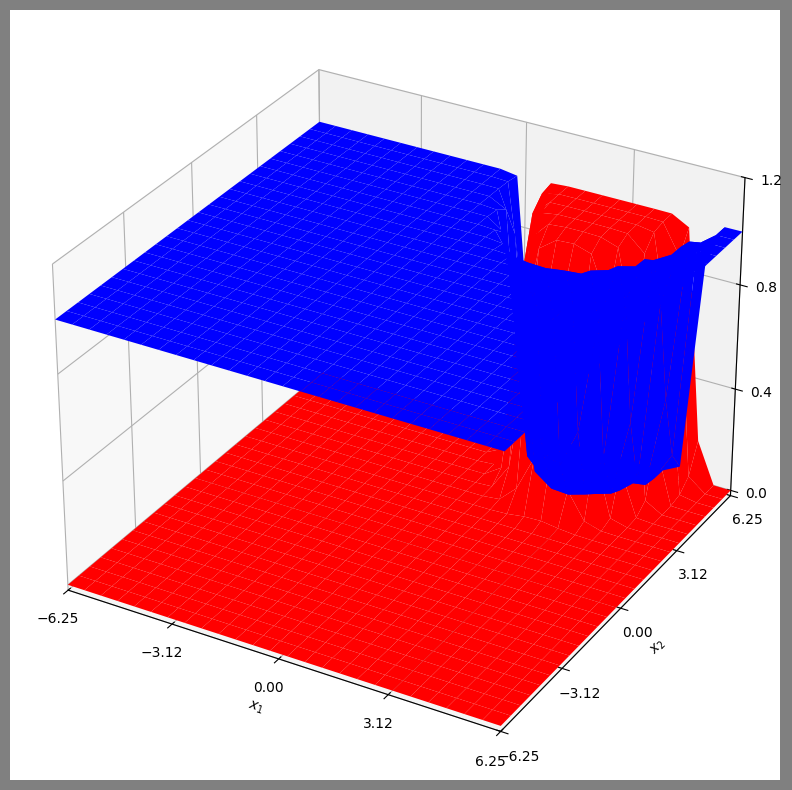

In [19]:
x1, x2, my, Sgm, posterior, df = labsol3()
classplot(posterior, x1, x2, 0, gsv={'gsv': 1, 'figstr': 'pdf'})

### Authors
Daniel Linfon Ye Liu

Anton Maestre Gomez